In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal
import seaborn as sns
from scipy import stats

In [12]:
er_norm = pd.read_csv('./example_data/ER_osci_all.csv', index_col=0)
cy_norm = pd.read_csv('./example_data/CY_osci_all.csv', index_col=0)

In [13]:
from scipy.stats import linregress
from collections import namedtuple
from scipy.optimize import minimize
import numpy as np

def fit(X, params):
    """
    params[0]: base frequency
    params[1]: frequency change over time
    params[2]: phase shift of sine wave
    params[3]: amplitude
    params[4]: amplitude change over time, can only monotonically increase or decrease
    params[5]: slope of the signal
    params[6]: base offset from y axis
    
    """
    return np.sin(X * (params[0] + (params[1] * X)) + params[2]) * (params[3] + params[4] * X) + X * params[5] + params[6]

def cost_function(params, X, y):
    return np.mean((y - fit(X, params))**2)    
    
def deslope(series, starting_params):
    
    fit = minimize(
        cost_function, 
        starting_params, 
        args=(np.arange(len(series)), series), 
        method='BFGS', 
        options={
                "maxiter": 9999
            }    
        )
    
    return fit
    return series - fit.x[0] * np.arange(len(series))

0.14612058853906015
0
[ 1.24155036e-01  6.56669627e-05  1.68939864e+00 -1.10042733e-01
  2.70831322e-04 -7.79928259e-04  8.09657142e-02]
[ 1.60645530e-01 -2.46700507e-04 -7.87403314e-01 -1.35714627e-01
  6.73075231e-04  4.68458174e-04  4.22151248e-02]


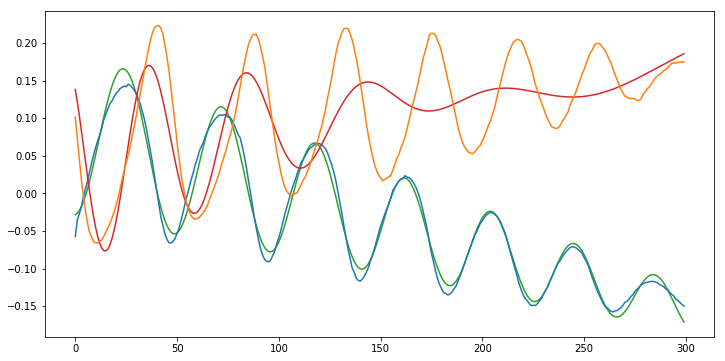

0.1455564163825387
1
[ 1.19606119e-01  6.05708589e-05  1.92345050e+00 -1.64659654e-01
  5.18935135e-04 -5.84698289e-04  8.23568517e-02]
[ 1.20235195e-01  5.93176058e-05  3.02772304e+00  1.93403381e-01
 -5.88995957e-04  1.61466155e-04  7.53604473e-02]


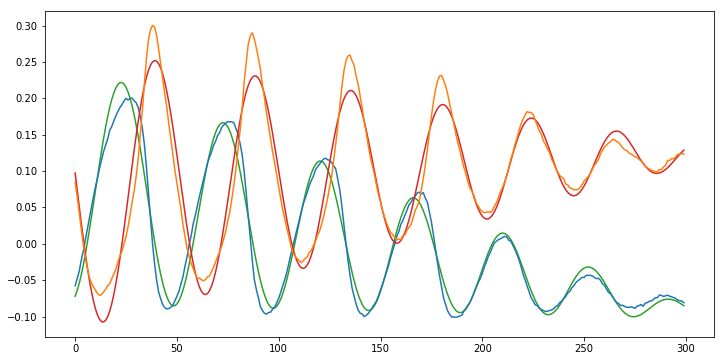

0.12368475014133043
2
[ 1.13803036e-01  3.23642240e-05  5.78338340e-01  1.12732746e-01
 -2.77115317e-04 -3.28472769e-04 -7.13859780e-02]
[ 1.12790729e-01  3.62743646e-05  1.49059184e+00 -8.94421084e-02
  2.02029460e-04  2.81978472e-04  5.28584604e-02]


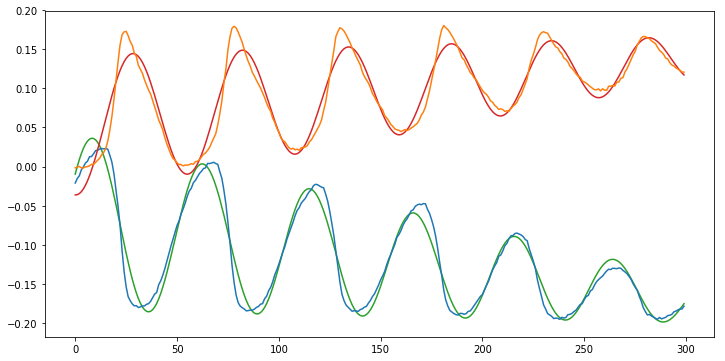

0.0300630875941607
3
[ 2.76888854e-02  2.07466275e-05 -4.48310786e-01 -1.00856682e-01
  9.16656264e-05 -1.78048192e-04 -3.49536502e-02]
[-1.72630893e-02  1.51778085e-04  3.47748242e+00  1.24072805e-01
 -1.59923019e-04  1.02259709e-04  5.48818325e-02]


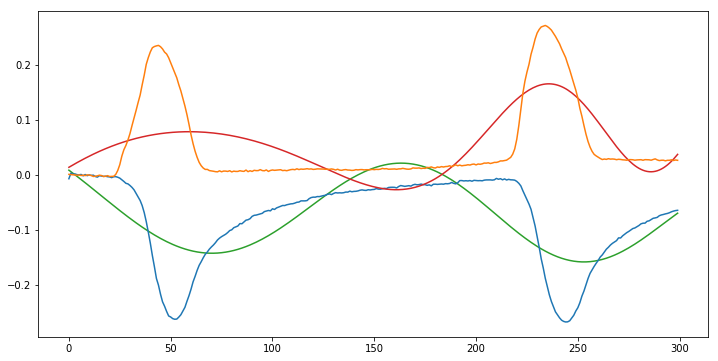

0.03902599569676762
4
[ 4.44120492e-02  1.82499788e-06 -1.72878567e+00 -8.83148142e-02
  2.18354795e-05 -1.78068907e-04 -5.60114780e-02]
[ 4.78566284e-02 -6.94159856e-06 -1.00771733e+00  1.22756039e-01
 -8.21608176e-05  2.06709788e-04  4.92463956e-02]


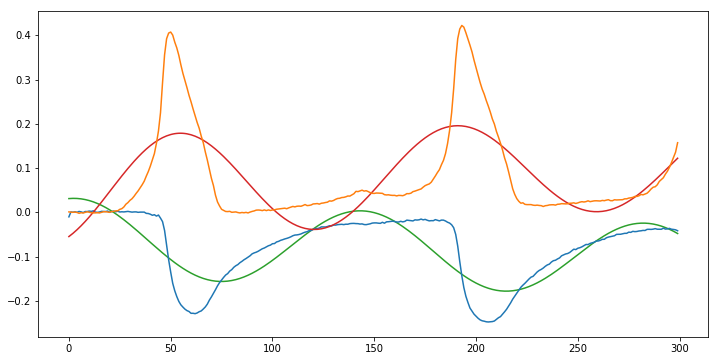

0.11707798709030286
5
[ 1.10698492e-01 -2.26166712e-05  4.43331066e-01  9.37324156e-02
 -4.03230148e-04 -3.60962329e-04 -9.08244047e-02]
[ 1.12668386e-01 -1.11754777e-05  1.10668187e+00 -3.13897810e-01
  1.16039151e-03  1.40968424e-04  2.91288532e-01]


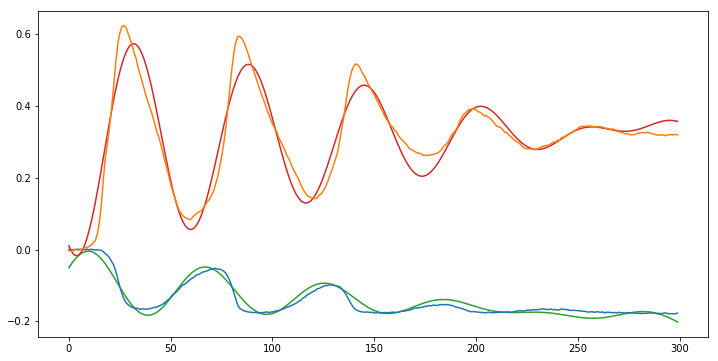

0.06070710441719407
6
[ 5.60723082e-02  1.86027001e-05 -2.71572888e-02  8.36531661e-02
 -7.50655905e-05 -1.86103076e-04 -4.06736067e-02]
[ 6.20855328e-02  1.85601394e-06  4.57105914e-01 -1.80145329e-01
 -6.16324706e-05 -1.36669376e-04  1.31998856e-01]


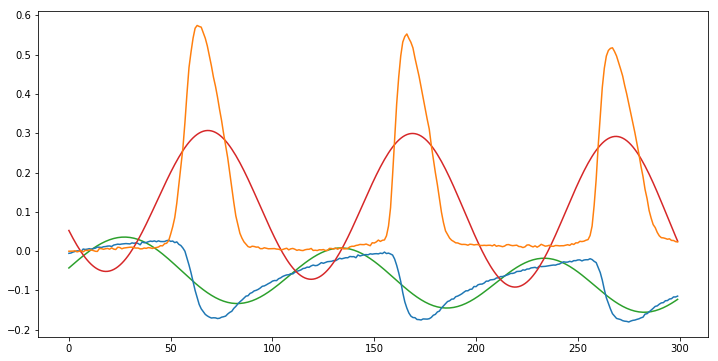

0.057119866428905326
7
[ 5.85352673e-02  1.34410449e-05 -1.11386798e-01  3.07479546e-02
 -1.37497435e-05 -1.70645047e-04 -1.81153276e-02]
[ 2.63362672e-02  8.45625767e-05  1.15752187e+00 -4.26666003e-02
  4.92575966e-04  1.30976655e-04  4.21905310e-02]


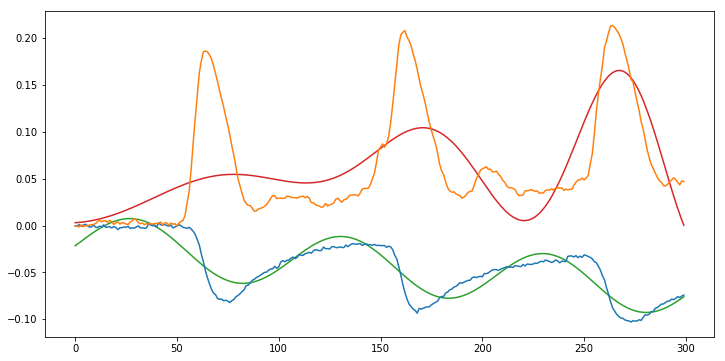

0.0657925163055454
8
[ 6.54323476e-02 -1.40301979e-06 -5.47273892e-01  6.13012435e-02
  3.20627571e-05 -2.63071450e-04 -2.83249282e-02]
[ 7.88298430e-02 -4.01779617e-05 -5.14952727e-01 -9.12735324e-02
 -1.34783582e-04 -5.00479204e-05  4.65441805e-02]


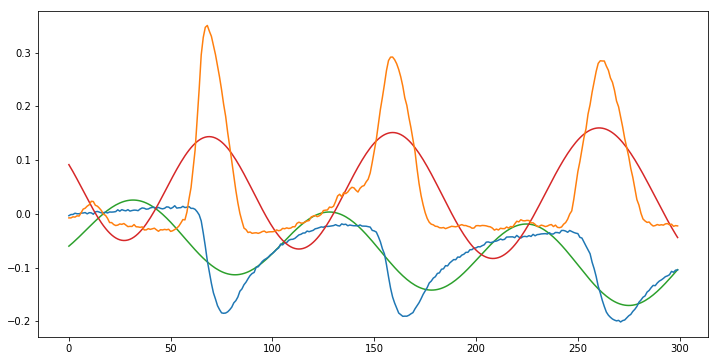

0.0619033035190107
9
[ 3.35449532e-02  3.30912389e-05 -1.33061430e-01  8.60234839e-02
 -5.78310773e-04 -2.85037016e-04 -2.56688628e-02]
[ 0.05925175 -0.0001271  -0.00683038  0.03296655 -0.00157222  0.00120535
 -0.02887907]


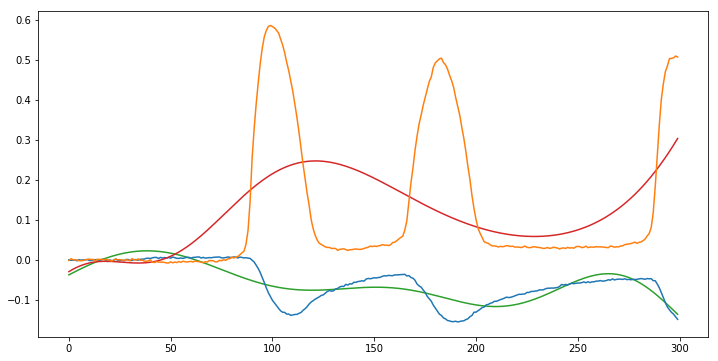

0.13585265529036944
10
[ 1.79966471e-01 -2.32606506e-04  3.02630286e-01  3.04759309e-02
 -1.29472784e-04 -1.55337044e-04 -4.11522439e-02]
[ 1.71629232e-01 -1.75568547e-04 -1.77369270e+00  2.49183317e-01
 -7.84276089e-04  2.00296267e-04  1.46344218e-01]


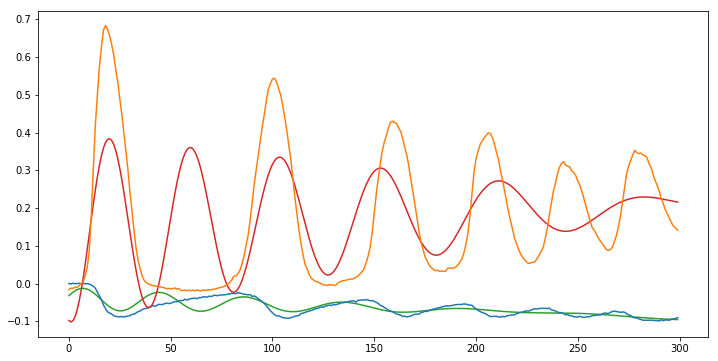

0.13885492391557097
11
[ 1.81013875e-01 -2.33378938e-04  4.44741059e-01  3.69461263e-02
 -1.56480501e-04 -1.88536583e-04 -4.89203861e-02]
[ 1.68957409e-01 -1.61434190e-04 -1.40082249e+00  2.11675254e-01
 -6.62227490e-04  2.49052549e-04  9.47786789e-02]


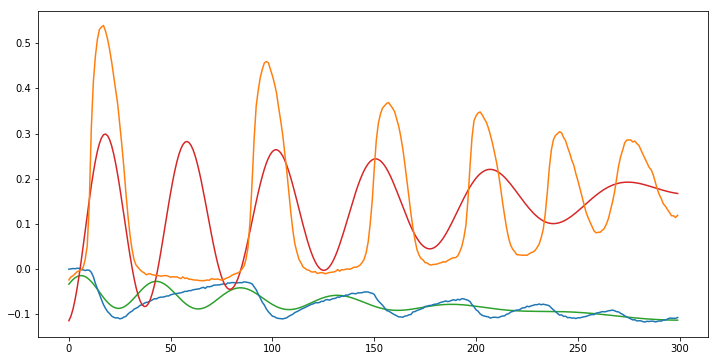

0.09285495527851605
12
[ 7.95429846e-02  3.89178035e-05  3.40311263e-01  2.71602980e-02
  6.89784828e-05 -4.26409379e-04 -1.14113416e-02]
[ 8.75102642e-02  1.65404003e-05  6.19669076e-01 -2.08776560e-01
  1.34597525e-04  7.06042622e-04  1.30688270e-01]


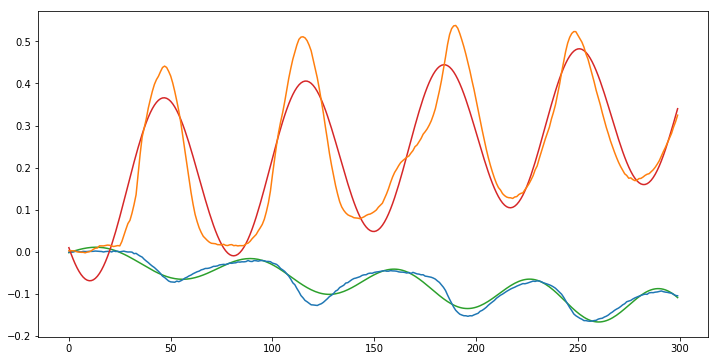

0.14040637557943209
13
[ 1.79385846e-01 -2.29711484e-04  5.60717083e-01  3.54655925e-02
 -1.42341678e-04 -1.63867125e-04 -4.80453590e-02]
[ 1.67113307e-01 -1.60544276e-04 -1.19649608e+00  1.72218106e-01
 -5.74136950e-04  2.20817610e-04  2.59402198e-02]


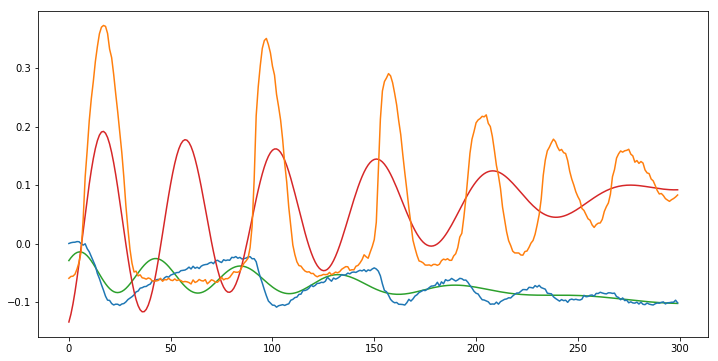

0.12955021251916674
14
[ 8.79691396e-02  1.04518160e-04  2.86182080e+00 -7.84910967e-02
  1.11508738e-04 -5.56371144e-04 -6.62916614e-02]
[ 1.35343804e-01 -2.15752264e-05  3.28148207e-03 -6.66931000e-02
  1.09484582e-03  5.65456688e-04  2.15751289e-01]


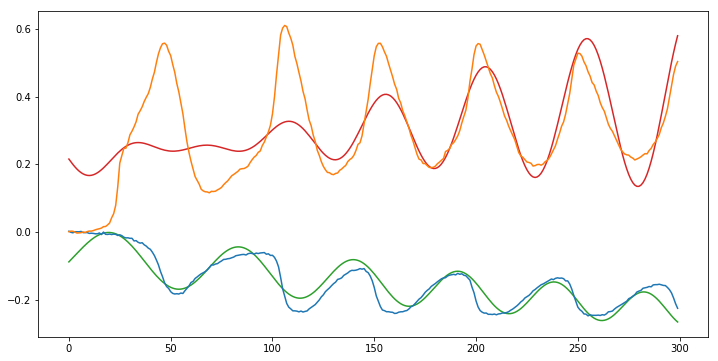

0.32221463113741466
15
[ 2.71407878e-01  1.56301703e-04  4.04442939e+00  1.19216252e-02
  7.94967494e-06 -2.66526041e-04  5.26980616e-04]
[ 3.02953232e-01 -6.34125545e-05  8.37829752e-01  5.39188206e-02
 -2.12089327e-04  2.86808188e-04  1.33512305e-02]


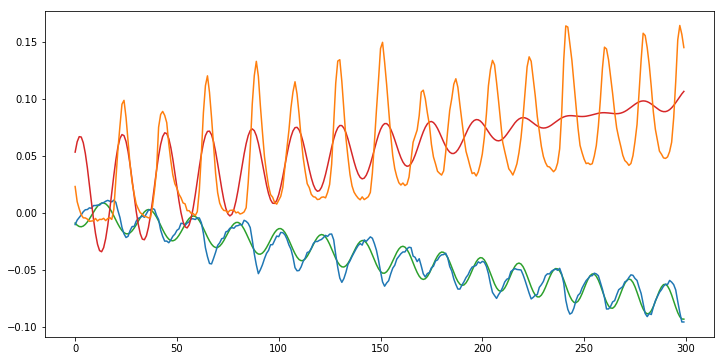

0.3215803503674591
16
[ 2.64989632e-01  1.72101311e-04  3.13908792e+00  1.28475089e-02
  5.64694928e-06 -3.02902636e-04  1.04293519e-02]
[ 2.64981024e-01  1.72705862e-04  3.77626398e+00 -7.08996265e-02
 -1.56393444e-05  3.34695005e-04 -2.66706017e-02]


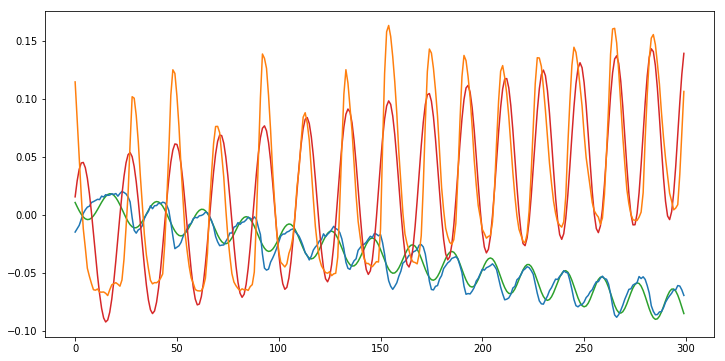

0.156427849971276
17
[ 1.76259683e-01 -1.11960151e-04  2.30965211e+00  1.39064622e-02
 -1.61196638e-04 -5.09547180e-04  9.47136109e-03]
[ 2.39405733e-01 -2.61591929e-04 -3.21347467e+00 -4.55759044e-03
  3.09314737e-04  9.72816827e-04 -1.19886771e-01]


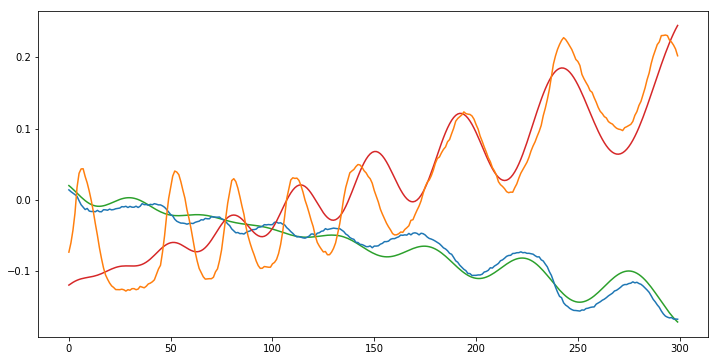

0.11678783098846815
18
[ 9.74000771e-02  5.49998201e-05  5.37846193e-01  4.98339482e-02
 -1.19339109e-04 -3.73662537e-04 -2.38222425e-02]
[ 9.47770094e-02  6.48083926e-05  1.64206230e+00 -1.04742805e-01
  2.06438540e-04  2.42429484e-04  4.34669153e-02]


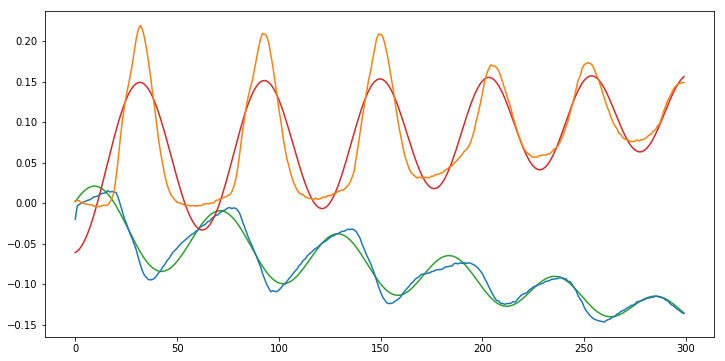

0.11321054607530785
19
[ 1.01994855e-01  2.73783109e-05  6.73708581e-01  2.58609092e-01
 -9.10170773e-04 -9.03632162e-04 -1.84580695e-01]
[ 9.74446271e-02  4.90423125e-05  1.90526006e+00 -4.66045169e-01
  1.48724072e-03  6.02306082e-04  2.16209300e-01]


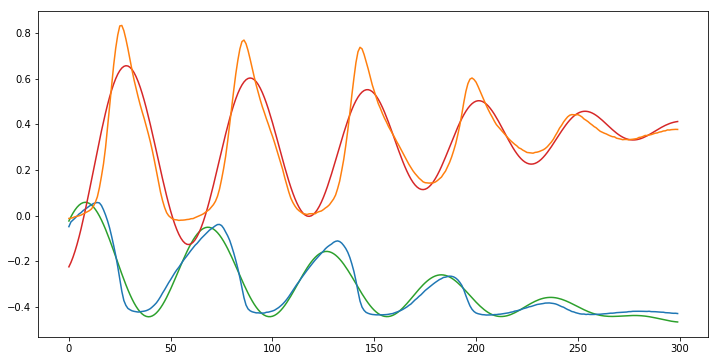

0.12616837966224068
20
[ 1.16832545e-01  4.11610410e-05 -2.95703292e-01  1.70224654e-01
 -3.72799347e-04 -9.52724088e-04 -1.28285550e-01]
[ 1.29009746e-01  2.98744641e-06  5.65333078e-02 -2.70293586e-01
  4.31128106e-04  1.85987503e-04  2.07132014e-01]


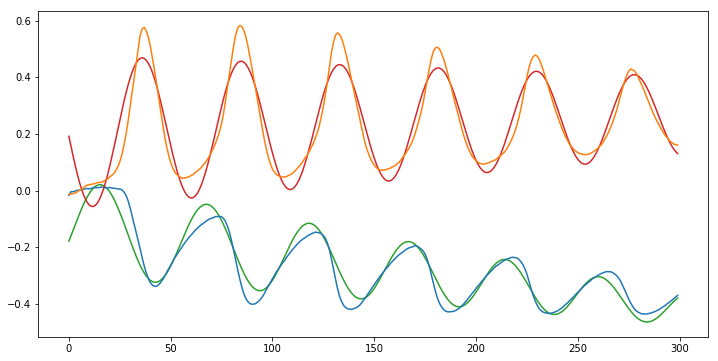

0.08055365778435367
21
[ 6.64555144e-02  3.12028850e-05  1.82671276e+00 -5.35300404e-02
  1.17853389e-05 -4.62943411e-04  2.43488290e-02]
[ 6.40509486e-02  3.40807715e-05  2.88872868e+00  2.09856632e-01
 -9.07147565e-05  5.41244618e-04  1.07766450e-01]


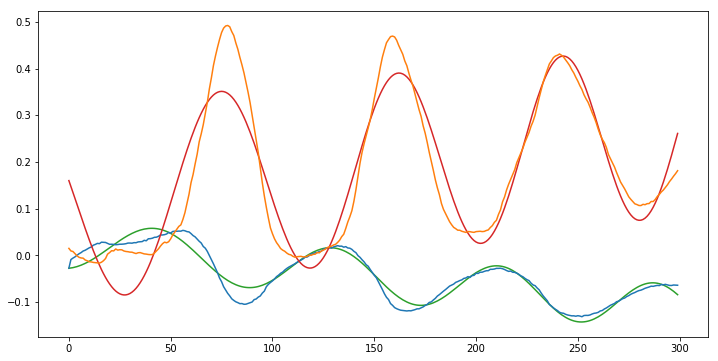

0.08267349088394192
22
[-7.20103229e-03  3.63861008e-04  6.56561677e+00  1.54930274e-01
 -5.58674348e-04 -1.36493807e-03 -2.82053301e-02]
[5.16565400e-02 8.26623653e-05 2.48294031e+00 1.43661227e-01
 2.20072453e-04 5.86531960e-04 5.02077194e-02]


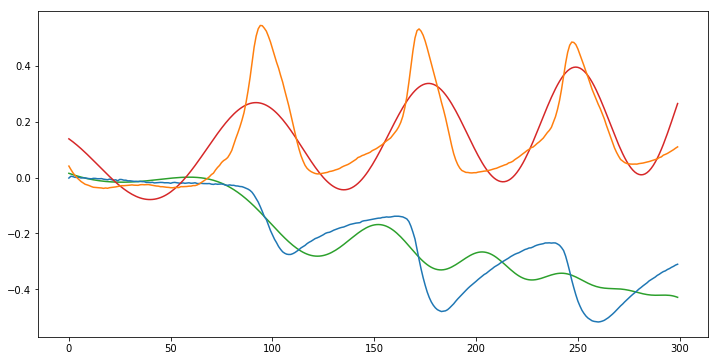

0.09018926278248209
23
[ 7.46650208e-02  7.33551450e-05 -1.12729183e+00  2.12412768e-02
  5.32694420e-05 -4.40910245e-04 -3.15042268e-03]
[ 8.25241869e-02  5.60636714e-05 -9.93513301e-01 -5.43408763e-02
 -4.07692720e-05  3.14863402e-04  2.82914149e-02]


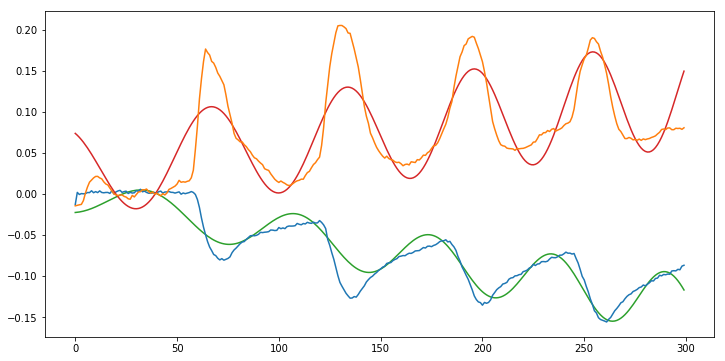

0.06477510625958337
24
[ 6.92480971e-02 -1.06033298e-05  3.45248436e-01  9.75689195e-02
 -2.47188157e-04 -2.31435273e-04 -8.29126250e-02]
[ 7.66204866e-02  1.64664247e-05  5.32093787e-01 -2.05792184e-01
  1.12716410e-03  8.92850179e-05  1.10331392e-01]


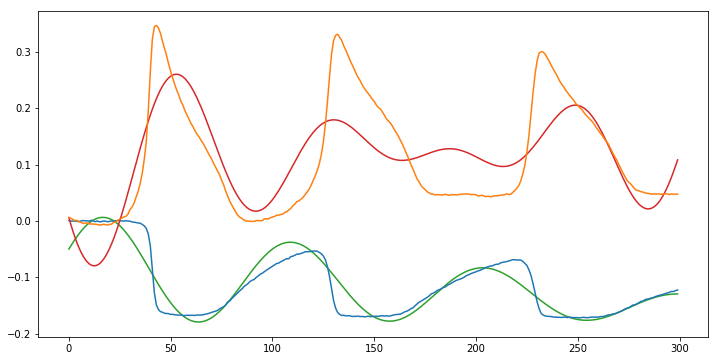

0.15019566471345625
25
[ 1.38481893e-01  6.85660367e-05  7.98009111e-01 -5.95272083e-03
  7.10078414e-05 -1.60345589e-04  1.10589549e-02]
[ 9.73730856e-02  1.68149388e-04  2.43654862e+00  1.06321210e-01
 -9.56232688e-05  2.82137530e-04 -3.55802757e-02]


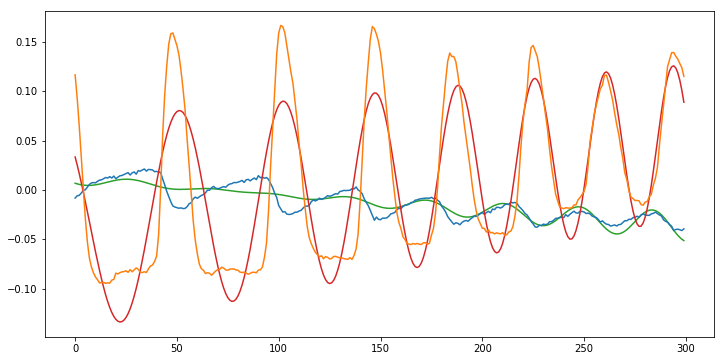

0.15707963267948966
26
[ 1.90309420e-01 -8.78559292e-05 -1.95898267e+00 -2.50813156e-02
  1.04991943e-04 -3.23964796e-04 -1.47793152e-02]
[ 1.78315587e-01 -1.27127224e-05 -1.16711110e+00  1.30483158e-01
 -4.95862902e-04  6.23851214e-04  3.77362235e-02]


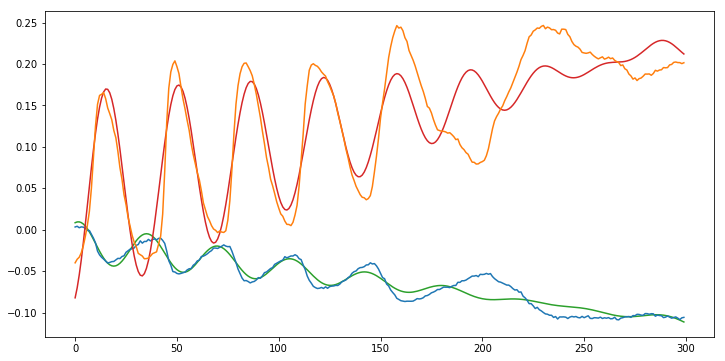

0.06544984694978735
27
[ 7.50915617e-02 -1.26968153e-04  1.21104315e+00  3.09089761e-02
 -1.57766229e-04 -1.85404277e-04 -2.51558858e-02]
[ 5.79258554e-02  5.73404645e-05 -5.70693381e-01  2.11617765e-01
 -1.33577784e-03  5.53213181e-04  4.46713021e-02]


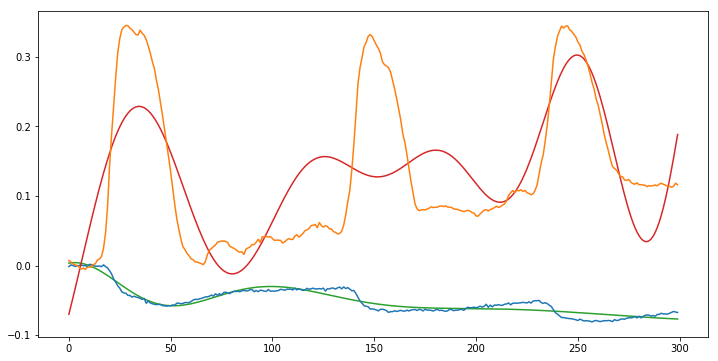

0.08726646259971647
28
[ 8.43339666e-02  1.77699026e-05  1.06338261e-01  3.50132290e-02
 -7.99930849e-05 -2.64573201e-04 -1.47267181e-02]
[ 8.26430741e-02  2.32769752e-05  1.12184005e+00 -1.12964066e-01
  2.01591541e-04  6.73798527e-04  6.53008220e-02]


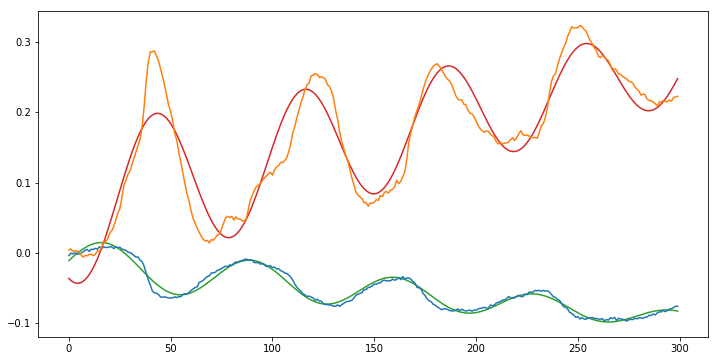

0.07805199139353523
29
[ 6.81199979e-02  1.98462516e-05 -1.54471222e-04 -1.02187948e-02
 -1.58993617e-04 -4.22574281e-04  1.59008428e-02]
[ 6.00675118e-02  3.97818874e-05  1.21669564e+00  1.14457312e-01
  1.37163636e-04  4.13313609e-04 -1.68590677e-01]


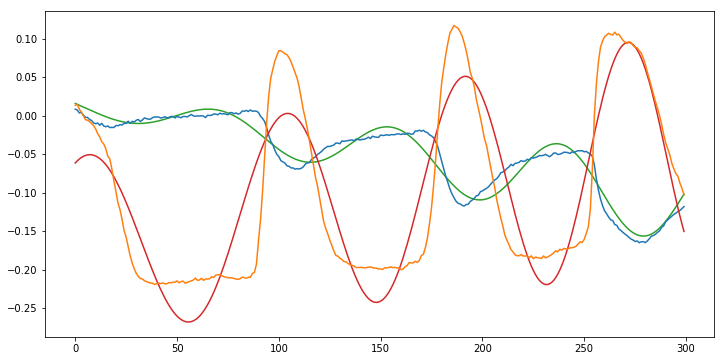

0.19634954084936207
30
[ 2.11180057e-01 -5.52815797e-05  2.54171775e-04  2.40789456e-03
 -3.81511493e-05 -1.27769783e-04 -4.12217294e-03]
[ 1.55843730e-01  7.45480618e-05  6.10560281e+00  4.24203749e-02
  5.40472664e-05  2.30669164e-04 -5.74297170e-02]


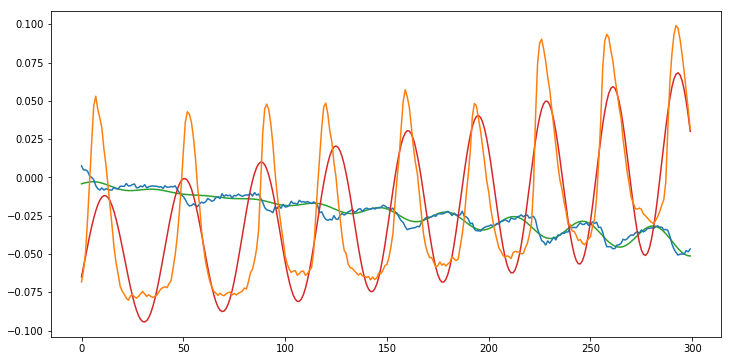

0.1121997376282069
31
[ 1.30730074e-01 -8.06743083e-05 -1.96329749e+00 -5.00101968e-03
  2.39673376e-05 -7.43951142e-05 -3.00652243e-03]
[ 1.05051798e-01  1.11680247e-04 -2.55201351e-01  1.14996510e-01
 -1.37844269e-04  2.95150145e-04 -6.61465311e-03]


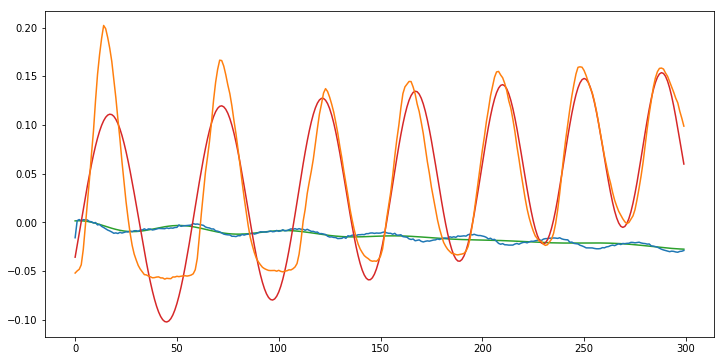

0.0915026986482464
32
[ 7.40207692e-02  4.78888466e-05  1.65845543e+00 -4.89349086e-02
  8.30990227e-05 -1.61285797e-04  4.46217915e-02]
[ 7.24005941e-02  5.13924896e-05  2.93784515e+00  1.24010846e-01
 -1.37780949e-04  1.57785252e-04  3.07372040e-02]


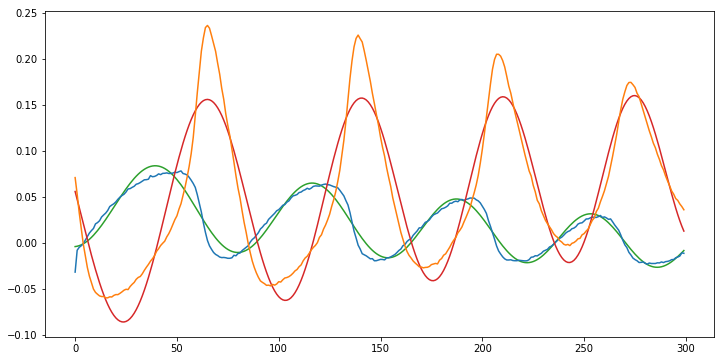

0.0849079095564809
33
[ 8.02518413e-02  4.26409672e-05 -5.67338921e-05  3.06579900e-03
  4.14716910e-05 -5.40206560e-05  2.08355333e-02]
[ 1.81402522e-01 -3.01786288e-04 -5.79161346e+00  7.32221276e-03
 -3.21364708e-04  3.73723901e-04 -1.64230814e-02]


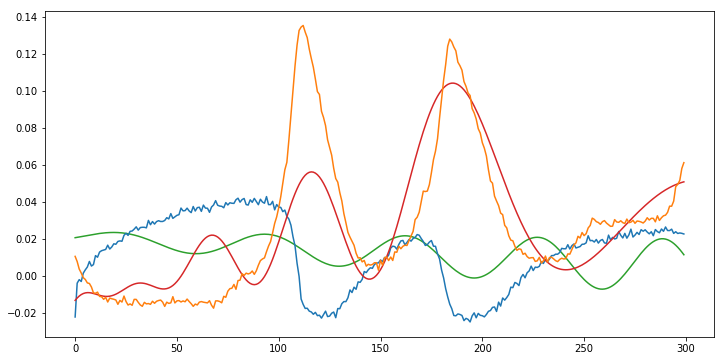

0.09377888518178487
34
[ 7.27802216e-02  5.14085675e-05  1.89563664e+00 -7.24938122e-03
  8.47692805e-06 -4.26938741e-05  6.86081004e-03]
[ 7.30545923e-02  5.03698763e-05  2.69087139e+00  3.45954349e-02
 -1.88723289e-05  1.83403197e-04 -1.47915652e-03]


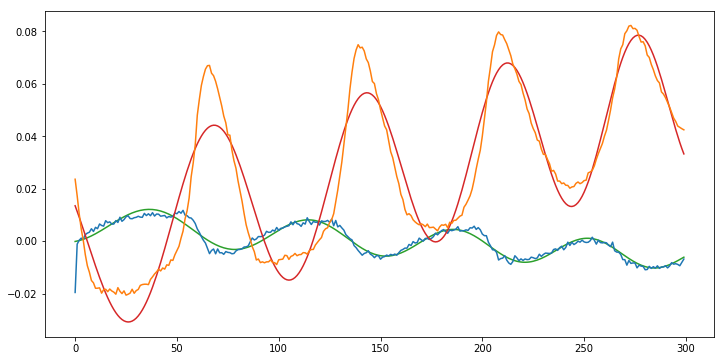

0.03653014713476504
35
[ 2.15999773e-02  5.09627299e-05  8.36561035e-01 -6.89283019e-02
  5.57408077e-05 -1.87103908e-04  1.01930008e-02]
[ 3.05194843e-02 -5.12130079e-05  3.91921727e+00 -8.95541682e-02
  2.73100960e-03 -2.78165052e-03 -3.85826835e-02]


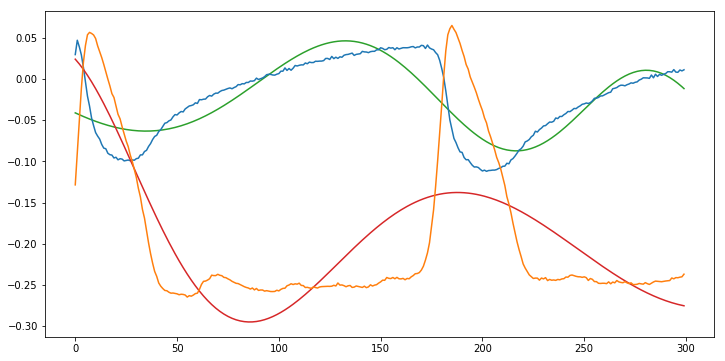

0.1025826172600749
36
[ 1.00733625e-01  8.47459507e-06 -1.10088917e+00  2.36565360e-02
 -6.85972991e-05 -7.27465135e-05  9.33146702e-03]
[ 1.05970172e-01 -1.66914247e-05 -3.60349961e-01 -3.39977668e-02
  8.97620237e-05  8.63509894e-05  6.14342984e-03]


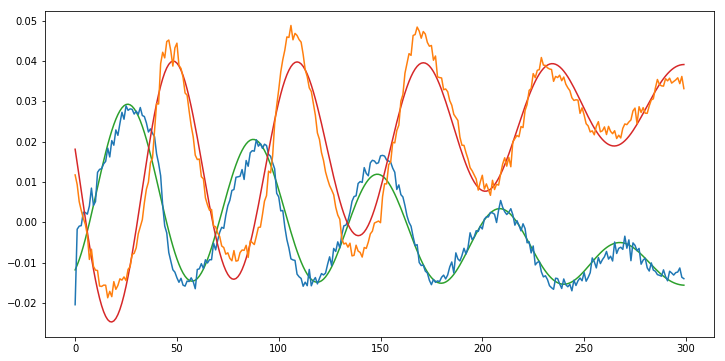

0.0619033035190107
37
[ 5.84763500e-02  1.67481629e-05 -8.53681965e-01  4.28390113e-02
 -1.12963001e-04 -1.58216142e-04  2.87600106e-02]
[ 6.15476320e-02  9.68815105e-06 -1.12793865e-01 -2.63572164e-02
  6.46637870e-05  5.14829605e-05  1.26807041e-03]


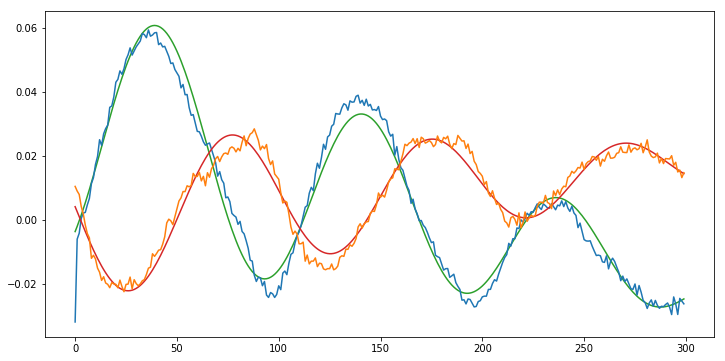

0.0915026986482464
38
[ 9.00301605e-03  3.12499426e-04  3.67515492e+00 -3.43701890e-02
  1.43912726e-04 -1.50590295e-04 -2.45782586e-02]
[ 4.38490138e-02  1.42076983e-04  2.84285390e+00  5.45105261e-02
 -1.92372049e-04  1.59716718e-04  1.49177483e-02]


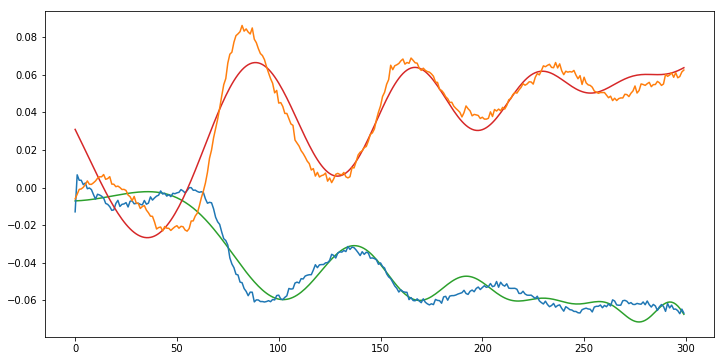

0.08529210824225682
39
[ 7.79221270e-02 -2.66230762e-05  1.77888666e+00 -3.88855277e-02
  1.78612923e-04 -1.88274880e-04  2.66577842e-02]
[ 7.11981279e-02  4.98312341e-05 -5.82067803e-01 -3.23526187e-02
  9.75061976e-05  1.37002354e-04 -7.56212306e-03]


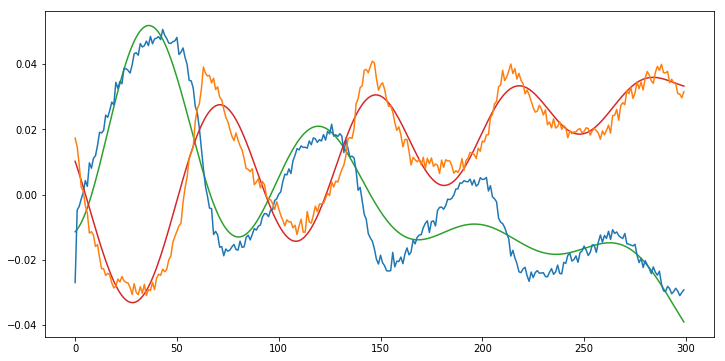

0.07348754745239282
40
[ 8.40770474e-02 -1.19772895e-04  1.53999910e+00  2.56036882e-02
 -1.27375709e-04 -8.77450395e-05 -2.01068467e-02]
[ 6.66284521e-02  1.94178936e-05 -2.08330987e-01  1.63570666e-01
 -5.87243299e-04  3.01546138e-04  1.34971178e-02]


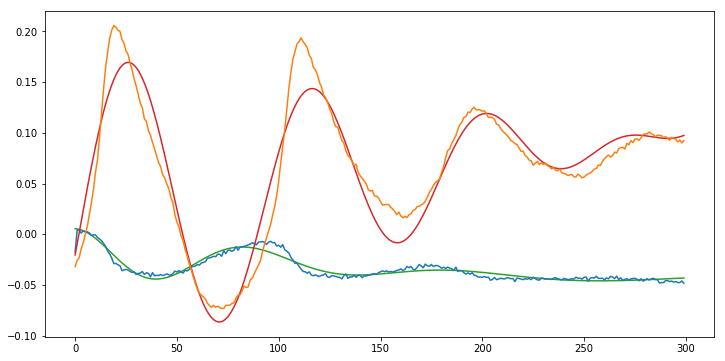

0.07263798042982181
41
[ 6.71503028e-02  1.05823817e-05  1.58189443e+00  1.30492630e-02
 -4.50481735e-05 -7.09878438e-05 -9.33448708e-03]
[ 6.83497315e-02  1.04723639e-05 -4.16871213e-01  2.41313602e-01
 -7.93148305e-04  4.11792992e-04  5.05197878e-02]


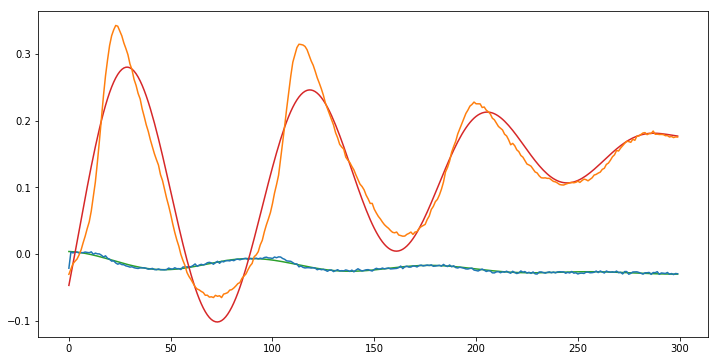

0.06314759102693052
42
[ 4.76266572e-02  2.63474136e-05  2.54203810e+00 -7.46523455e-02
  2.25782650e-04 -3.04158661e-04  1.65936926e-02]
[ 4.99893520e-02  2.07053774e-05 -6.74477189e-02 -6.65178209e-02
  2.04360280e-04  2.63043160e-04  1.66285379e-02]


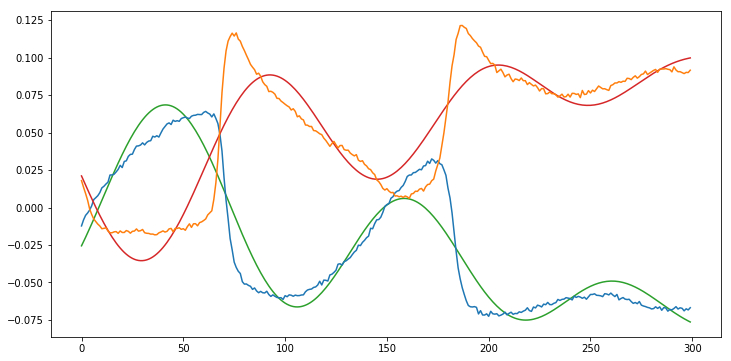

0.08607103160519981
43
[ 7.39198917e-02  3.72957604e-05  4.53872210e-01  7.97661739e-02
 -2.51204998e-04 -2.84533614e-04 -5.50449905e-02]
[ 7.68232849e-02  2.86644985e-05  1.16241914e+00 -9.09435239e-02
  2.69580278e-04  1.69404294e-04  6.52952337e-02]


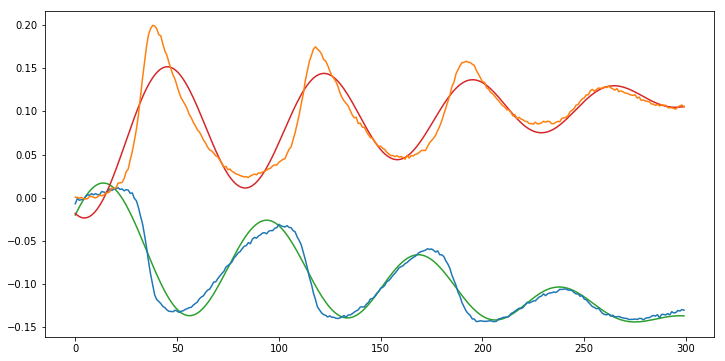

0.07222052077217915
44
[ 7.65525721e-02 -1.63345244e-05 -5.42896211e-01 -6.75535178e-02
  1.37801927e-04 -3.87849558e-04 -2.69684279e-02]
[ 7.87451599e-02 -2.43237194e-05 -1.36766926e-01  1.13415306e-01
 -3.53098401e-04  3.54474760e-04 -1.17841088e-02]


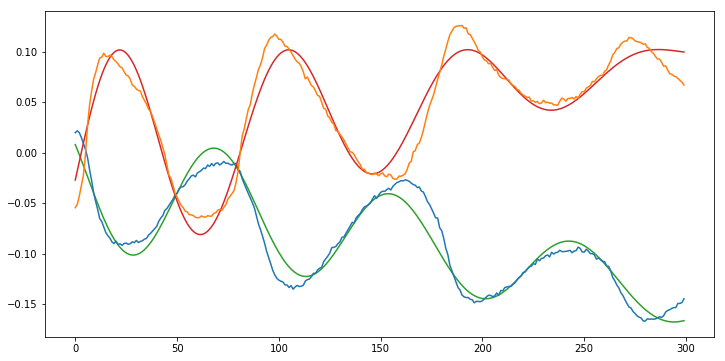

0.0657925163055454
45
[ 5.32914260e-02  3.11367305e-05  1.09614142e+00 -7.85884345e-02
  1.02598539e-04 -2.26706194e-04  7.78473320e-02]
[ 5.89117059e-02  1.76056716e-05  1.49029324e+00  3.52919604e-02
 -6.08267249e-05  1.56369846e-04 -5.21560163e-02]


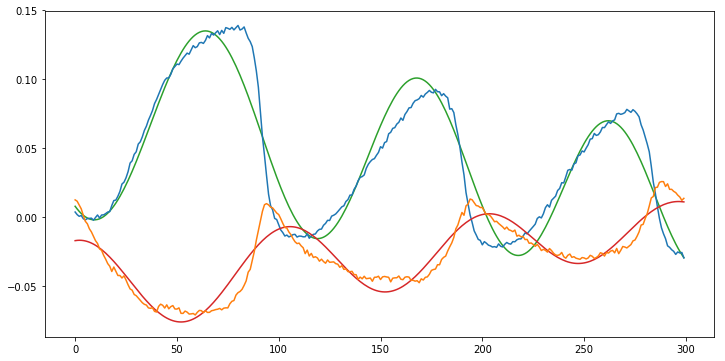

0.06544984694978735
46
[ 6.20777001e-02  5.96537905e-06  1.95596347e-01  4.27141731e-02
  1.35268242e-06 -1.49212940e-04 -2.80923736e-02]
[ 6.59690396e-02 -8.14550615e-06  7.62844320e-01 -4.36769035e-02
  1.44588925e-05  2.12218341e-04  3.31854536e-02]


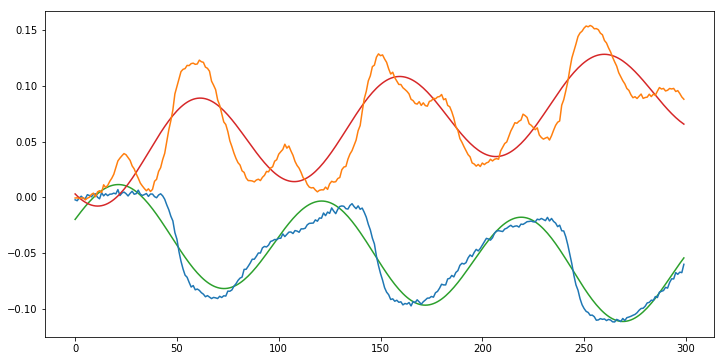

0.08607103160519981
47
[ 9.44541240e-02 -3.04546395e-05  3.89751713e-01 -3.34491664e-02
  3.73863835e-05 -1.81773612e-04  2.78579698e-02]
[ 9.39378476e-02 -2.71385691e-05  1.00062642e+00  5.72375781e-02
 -9.71270072e-05  2.27727683e-04 -5.87328762e-02]


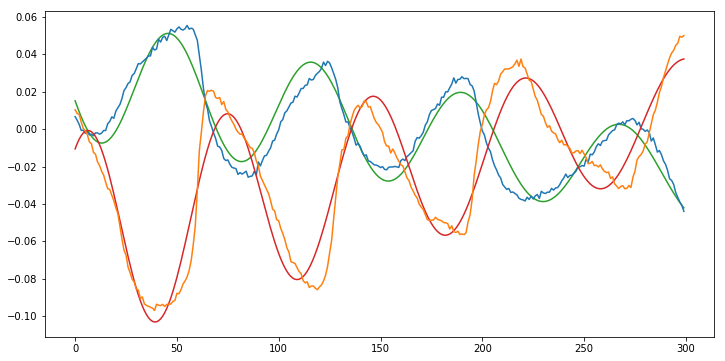

0.11321054607530785
48
[ 9.13394581e-02  7.03605502e-05  1.10834602e+00 -2.94776656e-02
  6.04488721e-05 -1.73818875e-04  3.50756385e-02]
[ 9.21461963e-02  7.09097388e-05  1.84395016e+00  6.97349500e-02
 -1.73714898e-04  2.47829800e-04 -6.51740655e-02]


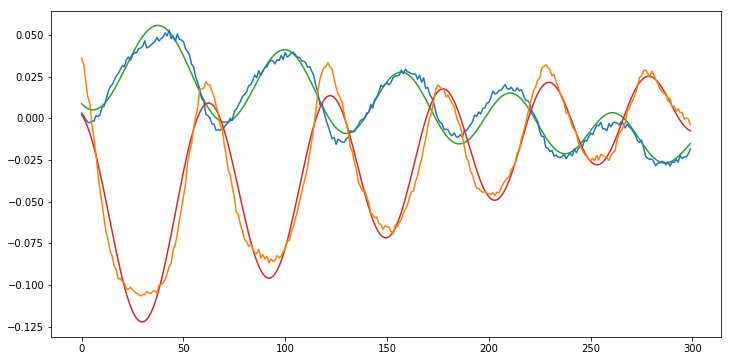

0.1121997376282069
49
[ 9.19984899e-02  6.70830569e-05 -2.26331536e-04 -6.40051697e-03
 -5.85833239e-07 -1.39163560e-04  5.37324648e-03]
[ 8.88492700e-02  7.46456274e-05  9.92909963e-01  7.51326645e-02
 -1.73774239e-04  5.62077829e-04 -7.67493149e-02]


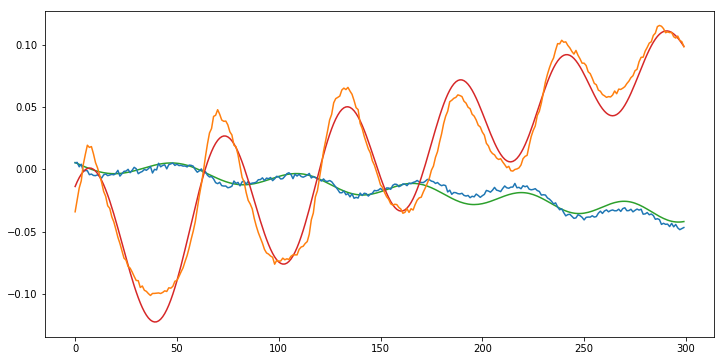

0.11528780380146031
50
[ 9.79126021e-02  4.84780785e-05  1.65150855e+00 -2.15074878e-02
  6.16497463e-05 -8.31764681e-05  1.40742957e-02]
[ 1.01982329e-01  3.75937431e-05  2.32964184e+00  4.69031167e-02
 -1.13522251e-04  1.68536109e-04 -1.67464091e-02]


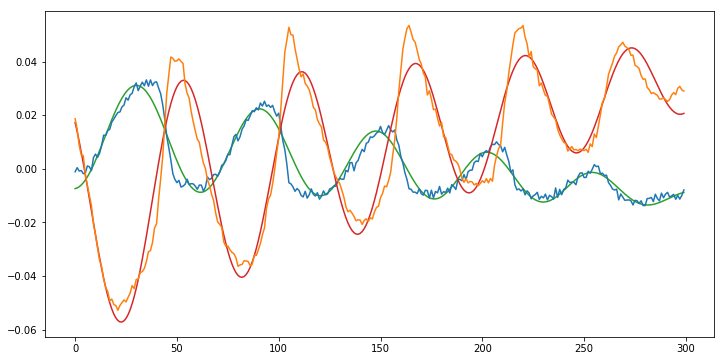

0.23081088883516848
51
[ 2.58585117e-01 -9.12063180e-05 -2.49165955e+00 -1.24340878e-02
  2.35619267e-05 -1.18916238e-04 -1.00830163e-02]
[ 2.55515532e-01 -8.20484858e-05 -1.77928857e+00  1.43678444e-01
 -1.97355243e-04  1.85181806e-04  3.02261038e-02]


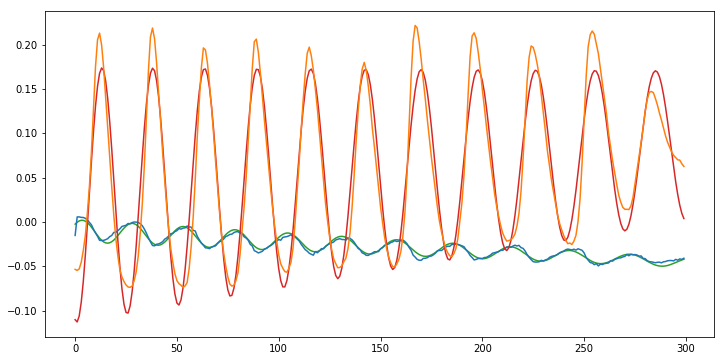

0.11744271602204834
52
[ 8.96489204e-02  8.81202596e-05  1.69652201e+00 -1.82638288e-02
  1.82053104e-05 -1.28844392e-04  7.72870361e-03]
[ 9.43512093e-02  7.42546463e-05  2.45794960e+00  2.16715552e-02
  5.11689351e-05  5.98942591e-04 -2.48664525e-02]


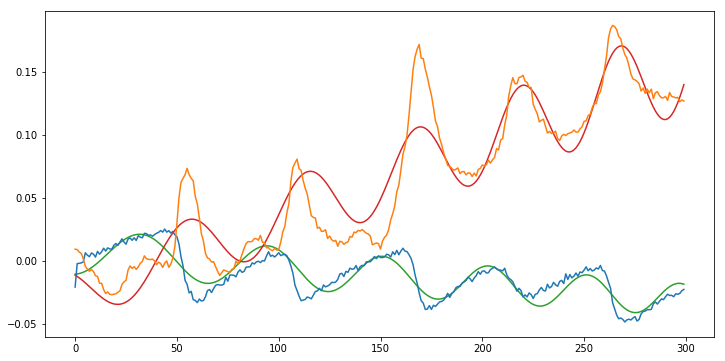

0.07509783235672812
53
[ 7.21882619e-02  5.00142599e-06  5.86178111e-01  1.90039071e-01
 -1.63286227e-04 -5.03324080e-04 -1.44075614e-01]
[ 7.51725968e-02 -4.01008532e-06  1.43296763e+00 -2.26951812e-01
 -1.21294203e-06  1.02574017e-04  1.37876597e-01]


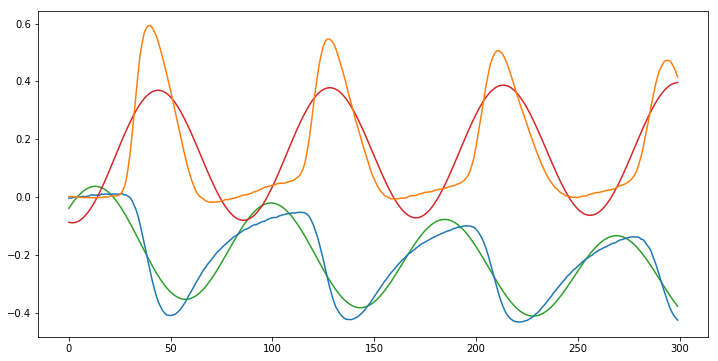

0.07479982508547126
54
[ 7.18059494e-02  6.91220991e-06  4.23325495e-01  1.20266962e-01
 -6.75629968e-05 -3.50139350e-04 -8.34750201e-02]
[ 7.73955700e-02 -7.31090982e-06  9.12029493e-01 -1.00825837e-01
  3.25590947e-05  1.01428098e-04  7.16778057e-02]


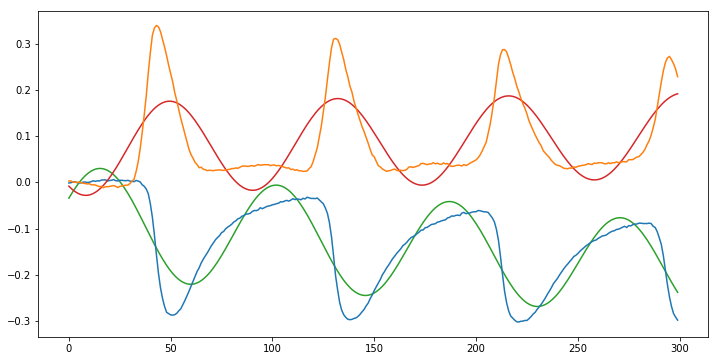

0.11023132117858922
55
[ 2.30471535e-02  2.84699115e-04  6.47065216e+00  1.30549123e-01
 -4.77274266e-04 -1.06674596e-03 -6.65834125e-02]
[ 3.30177677e-02  2.44664152e-04  8.47290730e-01 -6.05474543e-01
  2.20677540e-03  5.04694845e-04  6.72037084e-01]


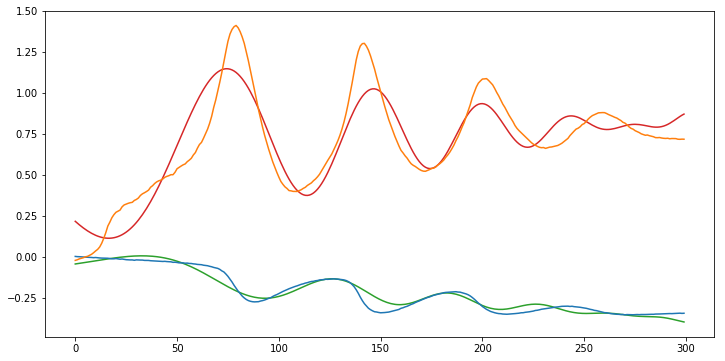

0.07953399123012134
56
[ 4.18372825e-02  1.09087049e-04  2.99564613e+00 -9.34121342e-02
  2.59751773e-04 -1.03583252e-03 -3.09058558e-02]
[ 4.39676957e-02  1.22420302e-04  3.44155385e+00  6.56053095e-01
 -2.47765665e-03  1.06893324e-03  4.59589003e-01]


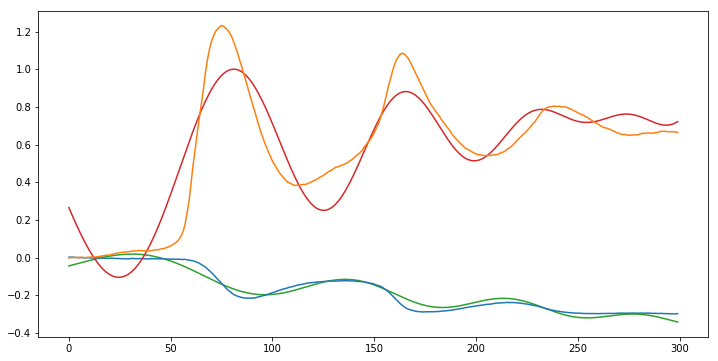

C:\Users\emsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\emsch\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.05
57
[ 1.77699114e-02  9.76837294e-05  2.34556716e+00 -2.72802964e-02
 -1.17105625e-04 -7.17366676e-04  1.41841808e-02]
[-1.84917043e-02  1.90091261e-04  6.51622879e+00  3.87000383e-01
 -6.95836253e-04  1.67628789e-03 -3.35763844e-02]


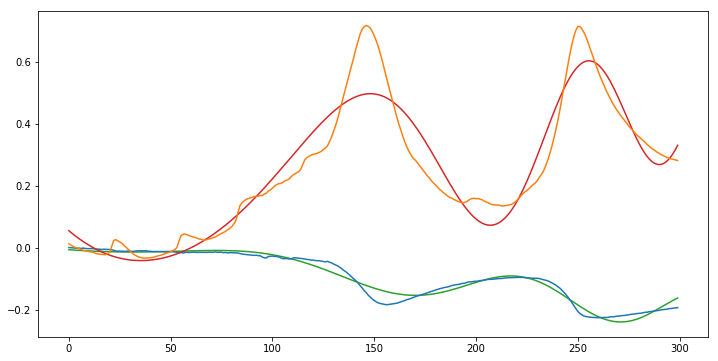

0.09973310011396168
58
[ 9.35459606e-02  9.29350808e-06  2.85347028e-04 -1.91932668e-02
  5.00102177e-04 -8.80937008e-04  2.00504302e-02]
[ 7.82854325e-02  4.17195339e-05  2.95239531e+00 -6.18022173e-02
 -6.88290405e-04  9.77419918e-04  2.67591557e-02]


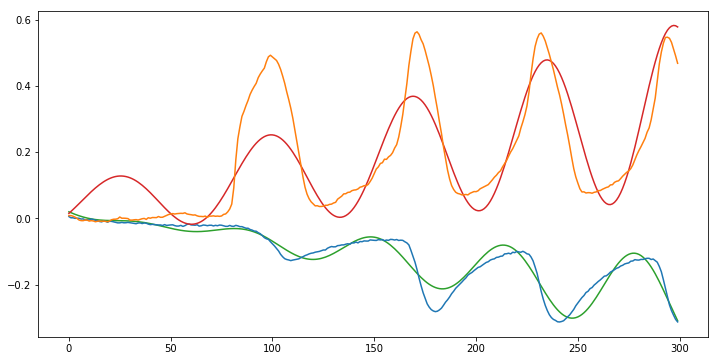

In [14]:
params = np.zeros((59,7))
for i in range(len(er_norm.columns)):
    data_a = er_norm.iloc[:,i].values
    data_b = cy_norm.iloc[:,i].values
    peaks_er = signal.find_peaks(data_a, prominence=0.01)
    peaks_cy = signal.find_peaks(data_b, prominence=0.01)
    f = 1/np.diff(peaks_er[0]).mean()
    param1 = f*2*np.pi
    
    if np.isnan(param1) == True:
        param1 = 0.05
    print(param1)
    #default_params = [ 1.39740841e-01,  0.00000000e+00, -2.06835672e+00,  1.00975570e-01, -2.81966088e-04, -7.40239424e-04,  8.12146968e-02]
    #default_params = [0.1,0,0,0,0,0,0]
    default_params = [param1,0,0,0,0,0,0]
    
    Parameters = namedtuple('parameter', [
        'frequency', 
        'frequency_change', 
        'phase',
        'amplitude',
        'amplitude_change',
        'slope',
        'y_offset'
    ])
    
    data_a_ds = deslope(data_a, default_params)
    data_b_ds = deslope(data_b, default_params)
    X = np.arange(300)

    model_a = fit(np.arange(300), data_a_ds.x)
    model_b = fit(np.arange(300), data_b_ds.x)
    
    print(i)
    print(data_a_ds.x)
    print(data_b_ds.x)
    plt.figure(figsize=(12,6))
    params[i,:] = data_b_ds.x
    plt.plot(model_a, c='C2')
    plt.plot(data_a, c='C0')
    plt.plot(model_b, c='C3')
    plt.plot(data_b, c='C1')    
    plt.show()

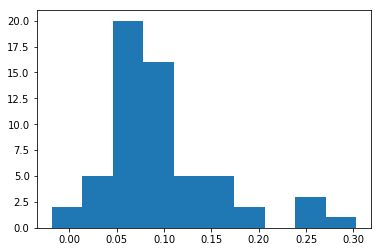

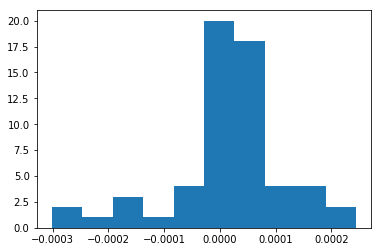

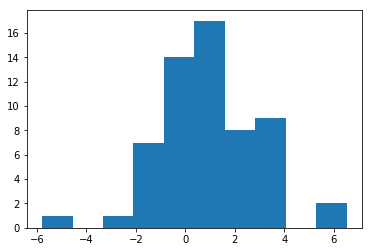

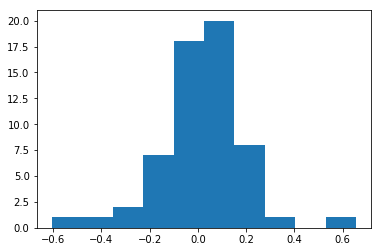

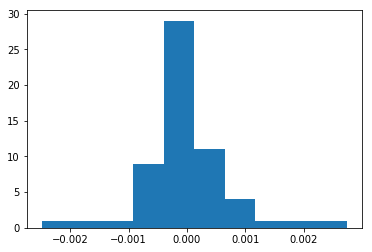

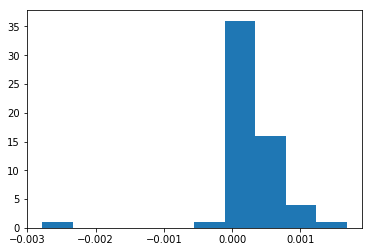

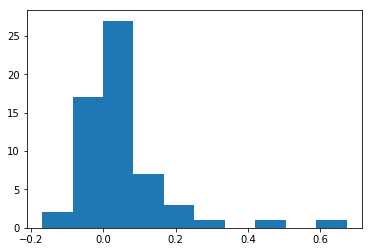

In [6]:
params = np.nan_to_num(params, 0)

for i in range(7):
    plt.hist(params[:,i])
    plt.show()

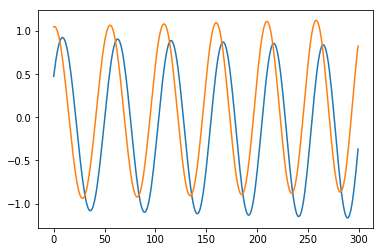

In [7]:
X = np.arange(300)
plt.plot(np.sin(X * (1.13803036e-01 + (3.23642240e-05 * X)) + 5.78338340e-01)+ X * -3.28472769e-04 + -7.13859780e-02)
plt.plot(np.sin(X * (1.12790729e-01 + (3.62743646e-05 * X)) + 1.49059184e+00)+ X * 2.81978472e-04 + 5.28584604e-02)

In [8]:
params = [1.13803036e-01,  3.23642240e-05,  5.78338340e-01,  1.12732746e-01,-2.77115317e-04, -3.28472769e-04, -7.13859780e-02]

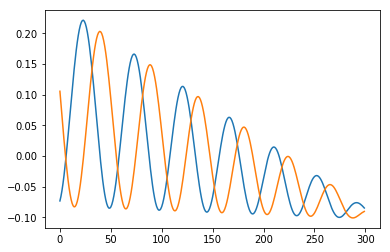

In [9]:
p1 = [ 1.19606119e-01,  6.05708589e-05,  1.92345050e+00, -1.64659654e-01,5.18935135e-04, -5.84698289e-04,  8.23568517e-02]
p2 = [ 1.20235195e-01,  5.93176058e-05,  3.02772304e+00,  1.93403381e-01, -5.88995957e-04,  1.61466155e-04,  7.53604473e-02]
p1[2] = 1.9
plt.plot(fit(X, p1))
p1[2] = np.pi+3
plt.plot(fit(X, p1))

In [10]:
(np.pi+3)-1.9

4.241592653589793